### Project: Create a neural network class

---

Based on previous code examples, develop a neural network class that is able to classify any dataset provided. The class should create objects based on the desired network architecture:

1. Number of inputs
2. Number of hidden layers
3. Number of neurons per layer
4. Number of outputs
5. Learning rate

The class must have the train, and predict functions.

Test the neural network class on the datasets provided below: Use the input data to train the network, and then pass new inputs to predict on. Print the expected label and the predicted label for the input you used. Print the accuracy of the training after predicting on different inputs.

Use matplotlib to plot the error that the train method generates.

**Don't forget to install Keras and tensorflow in your environment!**

---

### Import the needed Packages

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Needed for the mnist data
from keras.datasets import mnist
from keras.utils import to_categorical 

### Define the class

In [13]:
from itertools import tee

def map_architecture(architecture):
    a, b = tee(architecture)
    next(b, None)
    return zip(a, b)

In [14]:
class NeuralNetwork:

    def __init__(self, architecture, alpha, use_softmax_last = False):
        '''
            layers: List of integers which represents the architecture of the network.
            alpha:  Learning rate.
        '''
        # TODO: Initialize the list of weights matrices, then store
        # the network architecture and learning rate
        self.alpha = alpha
        self.layers = architecture
        self.use_softmax_last = use_softmax_last
        # we add 1 to prev to create a bias for each perceptron
        self.weights = np.array([np.random.randn(current, prev + 1) for prev, current in map_architecture(architecture)])
            
    def __repr__(self): 
        # construct and return a string that represents the network 
        # architecture 
        return "NeuralNetwork: {}".format("-".join(str(l) for l in self.layers))

    def softmax(self, x):  
        # applies the softmax function to a set of values
        
        expX = np.exp(x)
        return expX / expX.sum(axis=1, keepdims=True)
        
    def sigmoid(self, x):
        # the sigmoid for a given input value
        
        return 1.0 / (1.0 + np.exp(np.negative(x)))
    
    def sigmoid_softmax_deriv_rever(self, x):
        # the derivative of the sigmoid
        
        return x * (1 - x)
    
    def predict(self, inputs):
        # TODO: Define the predict function
        for i, layer in enumerate(self.weights):
            inputs[-1] = np.array([np.append(layer_input, 1.0) for layer_input in inputs[-1]])
            if i == len(self.weights) - 1 and self.use_softmax_last:
                layer_outputs = self.softmax(inputs[-1] @ layer.T)
            else:
                layer_outputs = self.sigmoid(inputs[-1] @ layer.T)
            inputs.append(layer_outputs)
        return inputs[-1]
        
    def train(self, inputs, labels, epochs = 10000, display_update = 100):
        # TODO: Define the training step for the network. It should include the forward and back propagation
        # steps, the updating of the weights, and it should print the error every 'displayUpdate' epochs
        # It must return the errors so that they can be displayed with matplotlib
        epoch_errors = []
        
        for epoch in range(epochs):
            # copy the inputs so as not to mutate them, they will be reused in subsequent epochs
            epoch_inputs = [np.copy(inputs[0])]
            
            # forward propagation
            epoch_outputs = self.predict(epoch_inputs)
            
            # error calculation
            epoch_error = labels - epoch_outputs
            
            # store error if appropriate
            if epoch % display_update == 0:
                print(np.mean(np.abs(epoch_error)))
                epoch_errors.append(np.mean(np.abs(epoch_error)))
                
            # initialize the error with the last level
            layer_error = epoch_error * self.sigmoid_softmax_deriv_rever(epoch_outputs)
            
            # set up the iterators
            it_epoch_inputs = reversed(epoch_inputs)
            next(it_epoch_inputs, None)
            
            for (layer, layer_outputs) in zip(reversed(self.weights), it_epoch_inputs):
                # update the weights for the current layer
                layer += self.alpha * (layer_outputs.T @ layer_error).T
                
                # calculate the error for the next layer
                layer_error = (layer_error @ layer) * self.sigmoid_softmax_deriv_rever(layer_outputs)
                
                # delete the last element in each error array, it is a byproduct of backpropagating the biases
                layer_error = np.delete(layer_error, -1, axis=1)
                
        return epoch_errors
    
    def get_accuracy(self, predictions, labels):
        inaccurate_n = 0
        inaccurate_list = []
        for i, (prediction, label) in enumerate(zip(predictions, labels)):
            for prediction_item, label_item in zip(prediction, label):
                if label_item == 1 and prediction_item < 0.95:
                    inaccurate_n += 1
                    inaccurate_list.append((i, prediction))
                    break
                if label_item == 0 and prediction_item > 0.05:
                    inaccurate_n += 1
                    inaccurate_list.append((i, prediction))
                    break
        inaccurate_rate = (len(predictions) - inaccurate_n) / len(predictions)
        return (inaccurate_rate, inaccurate_list)

### Test datasets

#### XOR

In [15]:
# input dataset
XOR_inputs = np.array([  
                [0,0],
                [0,1],
                [1,0],
                [1,1]
            ])

# labels dataset            
XOR_labels = np.array([[0,1,1,0]]).T

0.4961243035996392
0.4262786560754821
0.20312028838613672
0.08434016101318133
0.057124748000723424
0.04503474924570699
0.038017936240165806
0.033351928724552705
0.02998366445109451
0.02741512960034761
0.0253781549494585
0.02371456299946323
0.022324529218745705
0.02114167932528296
0.020120008102152052
0.01922653004271561
0.018436919668952757
0.017732806618270217
0.01710003290258692
0.016527493389798822
Predictions:
[[0.01633554]
 [0.98345726]
 [0.98317887]
 [0.01432596]]
Accuracy:
100.0%


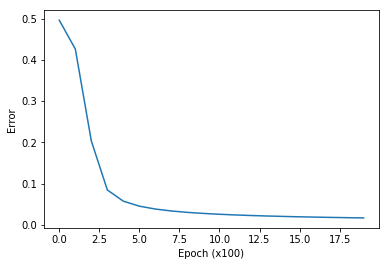

In [16]:
#TODO: Test the class with the XOR data

n = NeuralNetwork([2,4,4,1], 1)

errors = n.train([XOR_inputs], XOR_labels, epochs = 2000, display_update = 100)

predictions = n.predict([XOR_inputs])
print('Predictions:')
print(predictions)

accuracy = n.get_accuracy(predictions, XOR_labels)

print('Accuracy:')
print(str(accuracy[0] * 100) + '%')

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch (x100)')
ax.set_ylabel('Error')
ax.plot(errors)

#### Multiple classes

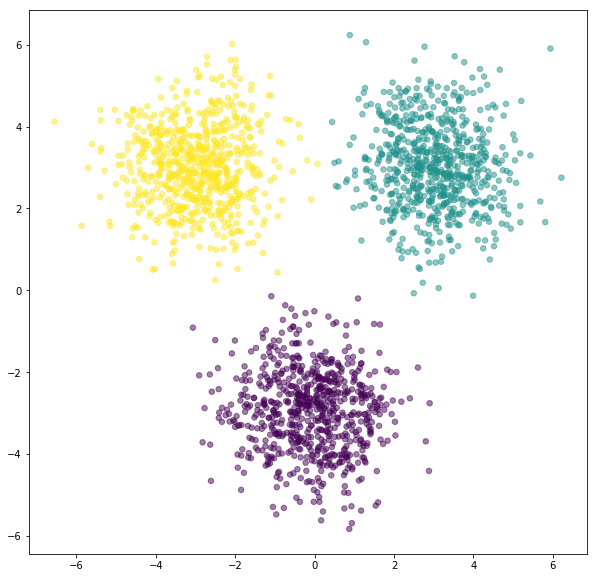

In [17]:
# Creates the data points for each class
class_1 = np.random.randn(700, 2) + np.array([0, -3])  
class_2 = np.random.randn(700, 2) + np.array([3, 3])  
class_3 = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([class_1, class_2, class_3])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):  
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,10))  
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, s=30, alpha=0.5)  
plt.show()

0.5227717884970742
0.009599231728164345
0.006910121574483836
0.005960688293858838
0.004675988624526146
0.003941992929325969
0.003515790578854446
0.00336610704791098
0.0027954989663438795
0.002664006564363756
0.002394608012232655
0.002162233582702107
0.0018363057680965342
0.0017268918645751198
0.0017004236635485693
0.0016842299535660952
0.001672301401298084
0.001662646984434509
0.001654282592056404
0.0016465740765556477
Accuracy:
99.66666666666667%


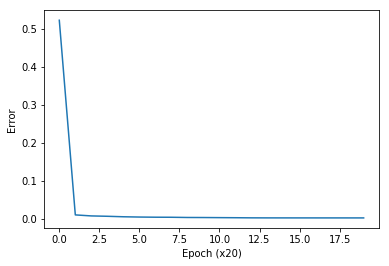

In [18]:
# TODO: Test the class with the multiple classes data

n = NeuralNetwork([2,3], 0.1, use_softmax_last = True)

errors = n.train([feature_set], one_hot_labels, epochs = 400, display_update = 20)

predictions = n.predict([feature_set])

accuracy = n.get_accuracy(predictions, one_hot_labels)

print('Accuracy:')
print(str(accuracy[0] * 100) + '%')

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch (x20)')
ax.set_ylabel('Error')
ax.plot(errors)

#### On the mnist data set

---
Train the network to classify hand drawn digits.

For this data set, if the training step is taking too long, you can try to adjust the architecture of the network to have fewer layers, or you could try to train it with fewer input. The data has already been loaded and preprocesed so that it can be used with the network.

---

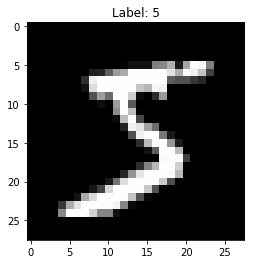

In [24]:
# Load the train and test data from the mnist data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Plot a sample data point
plt.title("Label: " + str(train_labels[0]))
plt.imshow(train_images[0], cmap="gray")

In [25]:
# Standardize the data

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
# turn values from 0-255 to 0-1
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Create one hot encoding for the labels
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

In [ ]:
# TODO: Test the class with the mnist data. Test the training of the network with the test_images data, and 
# record the accuracy of the classification.

n = NeuralNetwork([784,128,64,32,10], 0.001, use_softmax_last = True)

errors = n.train([train_images[0:5000]], train_labels[0:5000], epochs = 2500, display_update = 100)

predictions = n.predict([test_images])

accuracy = n.get_accuracy(predictions, test_labels)

print('Accuracy (without postprocessing):')
print(str(accuracy[0] * 100) + '%')

predictions = [[round(prediction_item) for prediction_item in prediction] for prediction in predictions]

accuracy = n.get_accuracy(predictions, test_labels)

print('Accuracy (with postprocessing):')
print(str(accuracy[0] * 100) + '%')

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch (x100)')
ax.set_ylabel('Error')
ax.plot(errors)

0.18068210437341303
0.10660137444930842
0.0690369160963957
0.05198621497706078
0.04169441645361387
0.034795929628618154
0.03003268956316282
0.026405258681094116
0.023544820131677434
0.021232487783874862
0.019371711556151378
0.017859721567282133
0.016557238738031877
0.015454937042368715
0.014502359541974734
0.013664958825069557
0.012915189527332982
0.012258421291386684
0.011618769709223941
0.011061445559467788
0.010580518759267434
0.01015049577197568
0.009750986359004225
0.009381556286274061
0.009001401169356726


After predicting on the *test_images*, use matplotlib to display some of the images that were not correctly classified. Then, answer the following questions: 

1. **Why do you think those were incorrectly classified?**
2. **What could you try doing to improve the classification accuracy?**


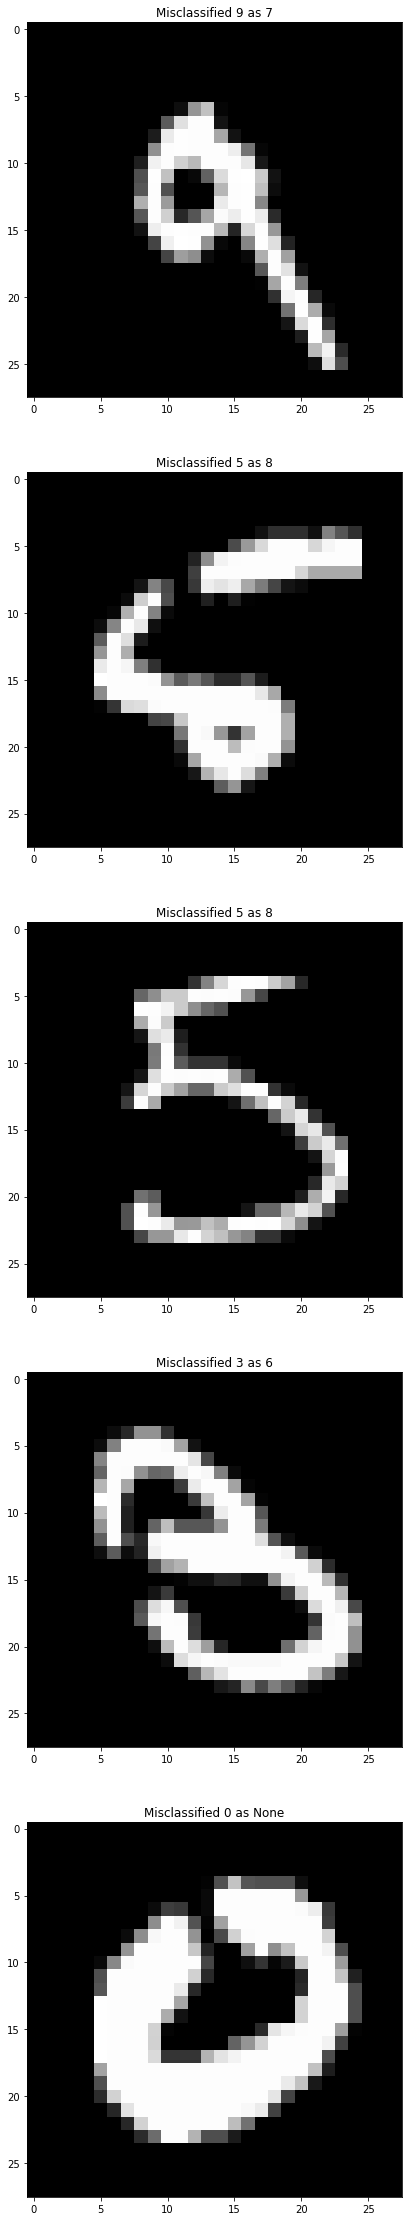

In [23]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

image_n = len(accuracy[1])

if len(accuracy[1]) > 5:
    image_n = 5

f, plots = plt.subplots(image_n, 1, figsize=(100,40))

for (prediction, plot) in zip(accuracy[1], plots):
    image = test_images[prediction[0]]
    label = test_labels[prediction[0]]
    wrong_label = prediction[1].index(1.0) if 1.0 in prediction[1] else None
    plot.set_title('Misclassified ' + str(label) + ' as ' + str(wrong_label))
    plot.imshow(image, cmap='gray')

1. Why do you think those were incorrectly classified?

Most of those images are badly drawn digits, only recognizable to a human eye thanks to years of experience reading and writing. The neural network only trained with 5000 images, so in these edge cases, it is understandable that it would fail.

2. What could you try doing to improve the classification accuracy?

I would feed the network the entire training set. But in order to do that, I would need to parallelize the network and run it on more appropriate hardware.